## Datadriven pump_it_up MODEL analysis

This is a test notebook that is used to see if i can work with GitHub and do a project in Pycharm on my local computer.
For this project i worked on the Pump it up dataset of datadriven.org
The final score is around .8

------------

This notebook is used to create a model based on the dataset that was cleaned.
Het totaal aantal metingen was 59400 en is uiteindelijk na cleaning gezakt naar 16192.

----------

TO DO: check correlation for each variable with the y variable, try different models

#### 1. Import the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/Nelleke/PycharmProjects/Pump_it_up/data/analysis_set.csv')

In [3]:
df.head()

,id,gps_height,construction_year,amount_tsh,population,basin,extraction_type_class,management_group,payment_type,quality_group,quantity,source_class,waterpoint_type_group,status_group
0,69572,1390,1999,6000.0,109,Lake Nyasa,gravity,user-group,annually,good,enough,groundwater,communal standpipe,functional
1,34310,686,2009,25.0,250,Pangani,gravity,user-group,per bucket,good,enough,surface,communal standpipe,functional
2,50409,1062,1987,200.0,250,Lake Nyasa,handpump,user-group,on failure,good,insufficient,groundwater,hand pump,functional
3,48451,1703,1978,500.0,35,Rufiji,gravity,user-group,monthly,good,dry,surface,communal standpipe,non functional
4,18274,1763,1992,500.0,1,Lake Nyasa,gravity,user-group,annually,good,enough,groundwater,communal standpipe,functional


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16192 entries, 0 to 16191
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16192 non-null  int64  
 1   gps_height             16192 non-null  int64  
 2   construction_year      16192 non-null  int64  
 3   amount_tsh             16192 non-null  float64
 4   population             16192 non-null  int64  
 5   basin                  16192 non-null  object 
 6   extraction_type_class  16192 non-null  object 
 7   management_group       16192 non-null  object 
 8   payment_type           16192 non-null  object 
 9   quality_group          16192 non-null  object 
 10  quantity               16192 non-null  object 
 11  source_class           16192 non-null  object 
 12  waterpoint_type_group  16192 non-null  object 
 13  status_group           16192 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.7+ 

#### 2. Create train and testset

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df.columns

Index(['id', 'gps_height', 'construction_year', 'amount_tsh', 'population',
       'basin', 'extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity', 'source_class', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [7]:
X = df[['gps_height', 'construction_year', 'amount_tsh', 'population',
       'basin', 'extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity', 'source_class', 'waterpoint_type_group']]
y = df[['status_group']]

X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

#### 3. Transform categorical variables to dummies and scale the numerical variables

In [8]:
#select the categorical data for the train and testset
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat = X_train_cat.astype('category')

X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat = X_test_cat.astype('category')

#select numerical datasets for both train and test
X_train_nr = X_train[['gps_height', 'construction_year', 'amount_tsh', 'population']]
X_test_nr = X_test[['gps_height', 'construction_year', 'amount_tsh', 'population']]

In [9]:
from sklearn.preprocessing import OneHotEncoder

#encode the category variables for traindata
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
encoder.fit(X_train_cat)
X_train_cat = pd.DataFrame(encoder.transform(X_train_cat), index=X_train.index)

# rename col names traindata
X_train_cat.columns = encoder.get_feature_names(['basin', 'extraction_type_class', 'management_group', 
                                                 'payment_type','quality_group', 'quantity', 'source_class', 'waterpoint_type_group'])

#merge categorie dummies with original set for train data
X_train = pd.concat([X_train,X_train_cat],axis=1)

#drop the original col with categories
X_train = X_train.drop(columns=['basin', 'extraction_type_class', 'management_group', 'payment_type','quality_group', 'quantity', 
                                 'source_class', 'waterpoint_type_group'])

In [10]:
#transform testdata
X_test_cat = pd.DataFrame(encoder.transform(X_test_cat), index=X_test.index)
X_test_cat.columns = encoder.get_feature_names(['basin', 'extraction_type_class', 'management_group', 
                                                 'payment_type','quality_group', 'quantity', 'source_class', 'waterpoint_type_group'])
X_test = pd.concat([X_test,X_test_cat],axis=1)
X_test = X_test.drop(columns=['basin', 'extraction_type_class', 'management_group', 'payment_type','quality_group', 'quantity', 
                                 'source_class', 'waterpoint_type_group'])

---------

In [11]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X_train_nr)
X_train_nr = pd.DataFrame(scale.transform(X_train_nr), index=X_train.index)
X_train_nr.columns = ['gps_height', 'construction_year', 'amount_tsh', 'population']
X_train = X_train.drop(columns=['gps_height', 'construction_year', 'amount_tsh', 'population'])
X_train = pd.concat([X_train,X_train_nr],axis=1)
X_train

,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,extraction_type_class_gravity,...,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,gps_height,construction_year,amount_tsh,population
6423,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.620153,0.636487,-0.088210,-0.495258
8138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-1.022464,-2.394253,-0.173746,-0.425676
8055,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.524306,-1.324580,0.713695,-0.495258
534,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.504476,-0.789744,-0.088210,0.537771
8026,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.095175,0.993044,0.000891,-0.495258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.005193,0.814766,0.179092,-0.443517
3264,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.563967,-1.681137,0.357293,-0.282943
9845,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-1.078650,-1.770277,-0.175528,2.179200
10799,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.970490,0.279929,-0.176419,-0.140210


In [12]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X_test_nr)
X_test_nr = pd.DataFrame(scale.transform(X_test_nr), index=X_test.index)
X_test_nr.columns = ['gps_height', 'construction_year', 'amount_tsh', 'population']
X_test = X_test.drop(columns=['gps_height', 'construction_year', 'amount_tsh', 'population'])
X_test = pd.concat([X_test,X_test_nr],axis=1)
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
basin_Internal,3239.0,9.941340e-02,0.299262,0.000000,0.000000,0.000000,0.000000,1.000000
basin_Lake Nyasa,3239.0,4.692806e-02,0.211517,0.000000,0.000000,0.000000,0.000000,1.000000
basin_Lake Rukwa,3239.0,2.469898e-02,0.155230,0.000000,0.000000,0.000000,0.000000,1.000000
basin_Lake Tanganyika,3239.0,1.170114e-01,0.321484,0.000000,0.000000,0.000000,0.000000,1.000000
basin_Lake Victoria,3239.0,2.686014e-02,0.161700,0.000000,0.000000,0.000000,0.000000,1.000000
basin_Pangani,3239.0,2.046928e-01,0.403539,0.000000,0.000000,0.000000,0.000000,1.000000
basin_Rufiji,3239.0,2.154986e-01,0.411231,0.000000,0.000000,0.000000,0.000000,1.000000
basin_Ruvuma / Southern Coast,3239.0,1.086755e-01,0.311280,0.000000,0.000000,0.000000,0.000000,1.000000
basin_Wami / Ruvu,3239.0,1.562211e-01,0.363121,0.000000,0.000000,0.000000,0.000000,1.000000
extraction_type_class_gravity,3239.0,5.192961e-01,0.499705,0.000000,0.000000,1.000000,1.000000,1.000000


#### 4. Try different machine learning models

One naive bayes models cannot be used as we have binomial and numerical data. Possiblity is to do categorial and continuous data and then multiply the results

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [14]:
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

print('De accuracy score op de trainset is:')
print(neigh.score(X_train,y_train).round(2))
print('')
print('De accuracy score op de testset is:')
print(neigh.score(X_test,y_test).round(2))

<ipython-input-14-8e3b91f9291d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(X_train, y_train)


De accuracy score op de trainset is:
0.87

De accuracy score op de testset is:
0.77


In [15]:
svm = SVC(kernel='rbf', gamma=1, C=2)

svm.fit(X_train, y_train)

print('De accuracy score op de trainset is:')
print(svm.score(X_train,y_train).round(2))
print('')
print('De accuracy score op de testset is:')
print(svm.score(X_test,y_test).round(2))

/Users/Nelleke/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


De accuracy score op de trainset is:
0.86

De accuracy score op de testset is:
0.77


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(X_train, y_train)

print('De accuracy score op de trainset is:')
print(rf.score(X_train,y_train).round(2))
print('')
print('De accuracy score op de testset is:')
print(rf.score(X_test,y_test).round(2))

<ipython-input-26-d812602f578f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


De accuracy score op de trainset is:
0.99

De accuracy score op de testset is:
0.76


In [31]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# see how the choosen model works in practice
mod = svm

In [37]:
y_pred = mod.predict(X_test)
labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=labels)

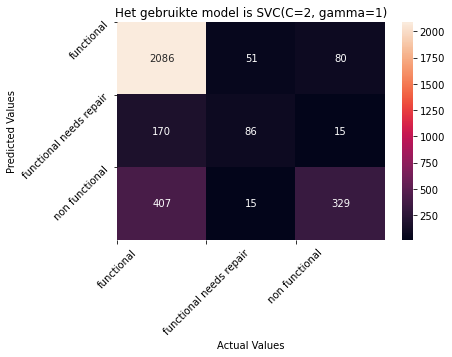

In [38]:
sns.heatmap(cm, annot=True,fmt='g')
plt.xticks(range(len(labels)), labels, rotation=45)
plt.yticks(range(len(labels)), labels, rotation=45)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Het gebruikte model is {}'.format(mod))
plt.show()